# ________________________________________________________________________________

 # objective
 <b>predict the amount of calories burnt using several features like age, heart rate etc.</b>



# ________________________________________________________________________________
# 1. Imports

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import datetime as dt

# ________________________________________________________________________________
# 2. Data analysis of exercise and calories csv

In [ ]:
# reading the csv
calorie_data = pd.read_csv("//content//calories.csv")
exerice_data = pd.read_csv("//content//exercise.csv")

calories csv has all the target values we need (how many calories user 123 has burned)

In [ ]:
calorie_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


exercise csv has the info of the user and how much they worked out

In [ ]:
exerice_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


A) checking if the calories_data csv
1. general shape
2. has any missing values
3. data distribution
4. columns

In [ ]:
# 1
calorie_data.shape # we have 15000 rows and 2 columns

(15000, 2)

In [ ]:
# 2 and 3
# calorie_data.isnull().sum()

calorie_data.describe() # both the columns have a count of 15000 so there are no missing values

# the average calories burned in 15000 workout sessions is 89.539533
# the highest calories burned is 314 across all the workouts

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [ ]:
# 4
calorie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


B) checking if the exercise_data csv
1. general shape
2. has any missing values
3. data distribution
4. columns

In [ ]:
# 1
exerice_data.shape # csv has 15000 rows and 8 columns

(15000, 8)

In [ ]:
# 2 and 3

# exerice_data.isnull().sum()

exerice_data.describe()

# all the columns have a count of 15000 so no missing values
# the mean row has all the averages values across all the workouts
# the max row has all the max values across the workouts

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [ ]:
# 4
exerice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


<b>
Both the csvs have no missing values /
gender is the only columns across the csvs that is string (object)
</b>

# ________________________________________________________________________________

# 3. making the "workout" dataframe and saving it

In [ ]:
exerice_data["Calories"] = calorie_data["Calories"]
workout = exerice_data

# this is out main dataframe
workout

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


# "workout" is our main dataframe with features and target "Calories"

In [ ]:
workout.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
workout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


no values in workout are null and the describe and info show all the columns and data distribution

In [ ]:
# saving the workout csv
workout.to_csv("//content//workout.csv")

# ________________________________________________________________________________

# 4. checking and visualing the corelation between features and calories columns in "workout"

#

In [ ]:
# visualising the distribution of all the features in dataset
sns.set()
# sns.set_style("darkgrid")
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

<Axes: xlabel='Gender', ylabel='Count'>

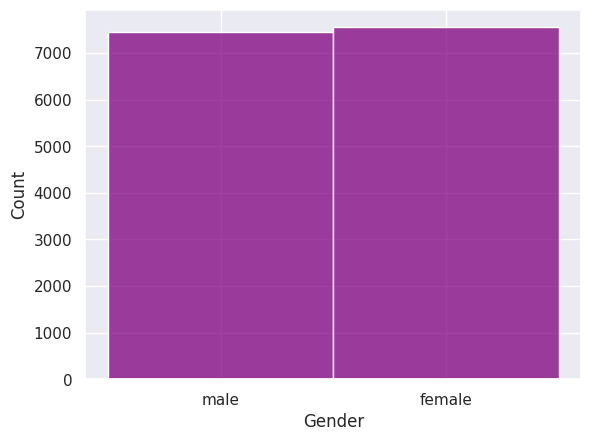

In [ ]:
# checking the distribution from male to female in the dataset
sns.histplot(workout["Gender"], color="purple")

### the distribution of male to female is even and good

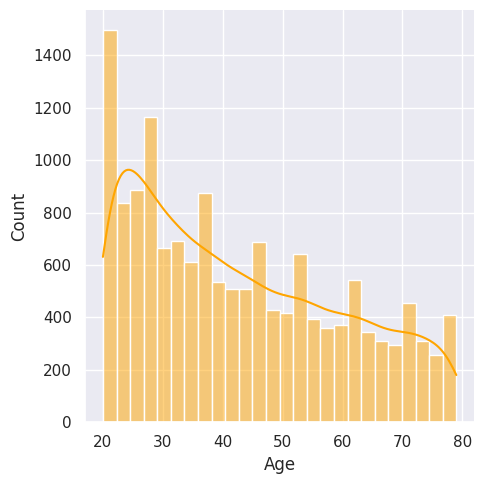

In [ ]:
sns.displot(workout["Age"], kde=True, color="orange")

### The are more people in the age range of 20 - 40 than 70 - 80 as old people dont workout as much as young making age a weak feature to predict calories as there are not many people of a higher age range

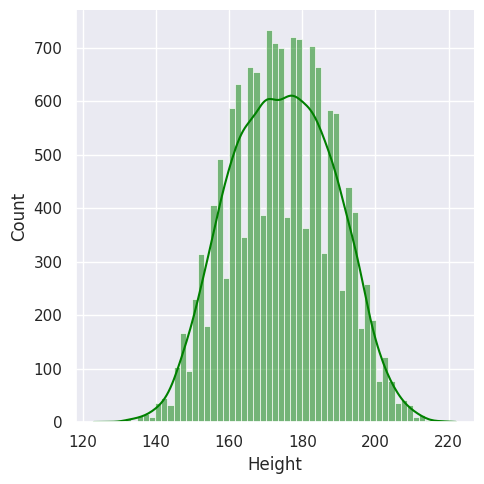

In [ ]:
sns.displot(workout["Height"], color="green", kde=True)

### the height is distributed evenly across the workouts with 160 - 180 cm (average height of a human) being the most common still not a good factor for predicting calories

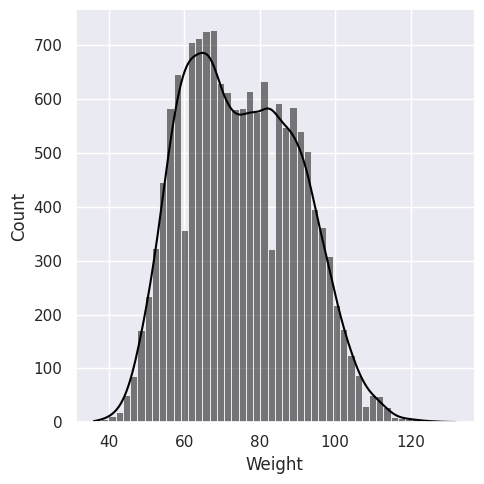

In [ ]:
sns.displot(workout["Weight"], color="black", kde=True)

### the distribution of wheight is slightly uneven withe the most age ranges between 60 - 80 the avarage weight of a human still not a good factor for predicting calories

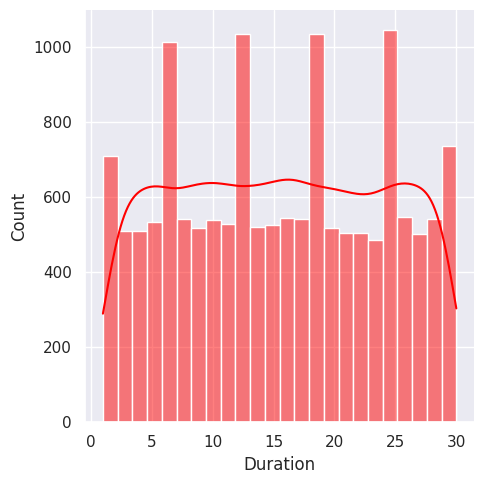

In [ ]:
sns.displot(workout["Duration"], kde=True, color="red")

### The duration of the workouts is spread unevenly with high spikes in 6, 12, 18, 25 min ranges making it a good factor for predicting calories

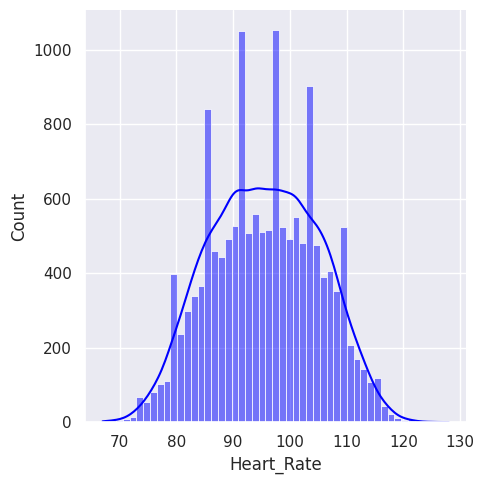

In [ ]:
sns.displot(workout["Heart_Rate"], kde=True, color="Blue")

### heart rate is spread unevenly as well making it a good factor for predicting calories, with people mostly having an average heart rate of somewhere between 80 - 110

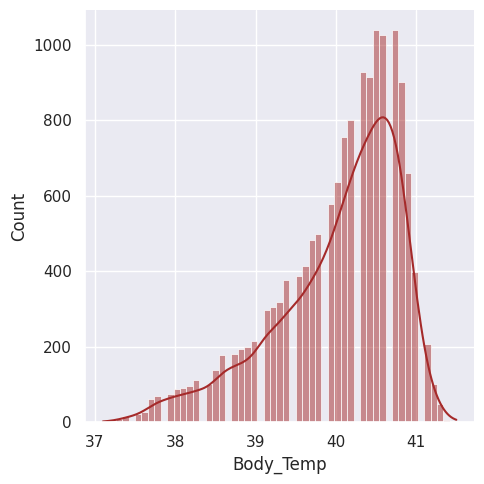

In [ ]:
sns.displot(workout["Body_Temp"], color="brown", kde=True)

### body temp is clearly spread unevenly making it a good factor for predicting calories

<Axes: xlabel='Duration', ylabel='Calories'>

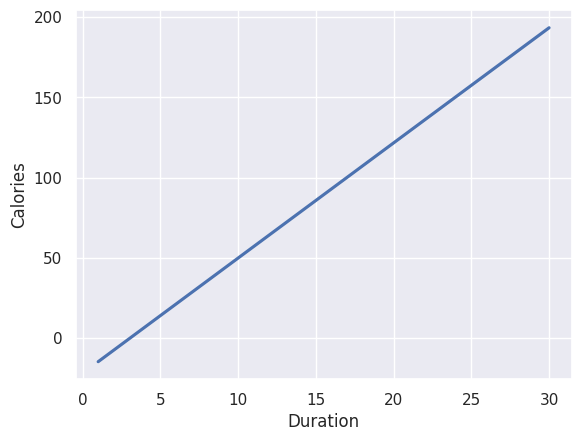

In [ ]:
sns.regplot(x="Duration", y="Calories", data=workout, scatter=False)

### there is a clear positive relation between Duration and Calories The higher the duration of workout the more calories burnt

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

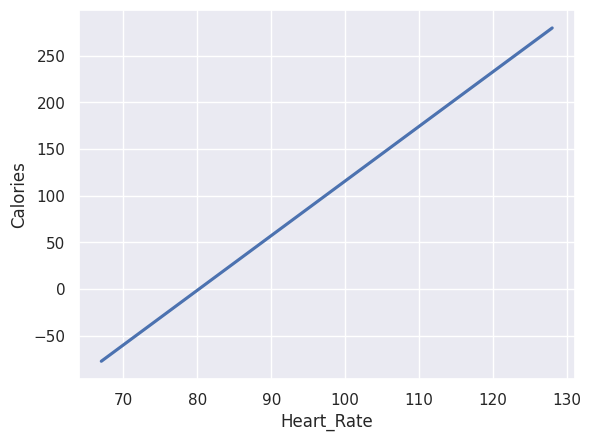

In [ ]:
sns.regplot(x="Heart_Rate", y="Calories", data=workout, scatter=False)

### There is a clear positive correlation between heart rate and calories as heart rate increases calories increase making it a good factor

<Axes: xlabel='Body_Temp', ylabel='Calories'>

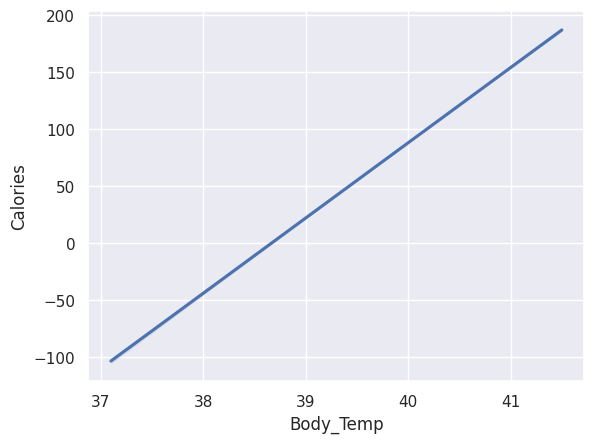

In [ ]:
sns.regplot(x="Body_Temp", y="Calories", data=workout, scatter=False)

### again a positive corellation between body_temp and calories the hotter the person gets the more calories they burn

In [ ]:
# changing the gender values to 0 and 1
workout.replace({"Gender":{'male':0,'female':1}}, inplace=True)

# checking overall correlation of calories with all features
workout.corr()

<ipython-input-31-216ab98f7a36>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  workout.replace({"Gender":{'male':0,'female':1}}, inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


### as we can see from the graphs and this table correlation of calories is positively related to Duration, Heart_Rate, Body_Temp making them the ideal factors to predict Calories. Lets visualize the table above

<Axes: >

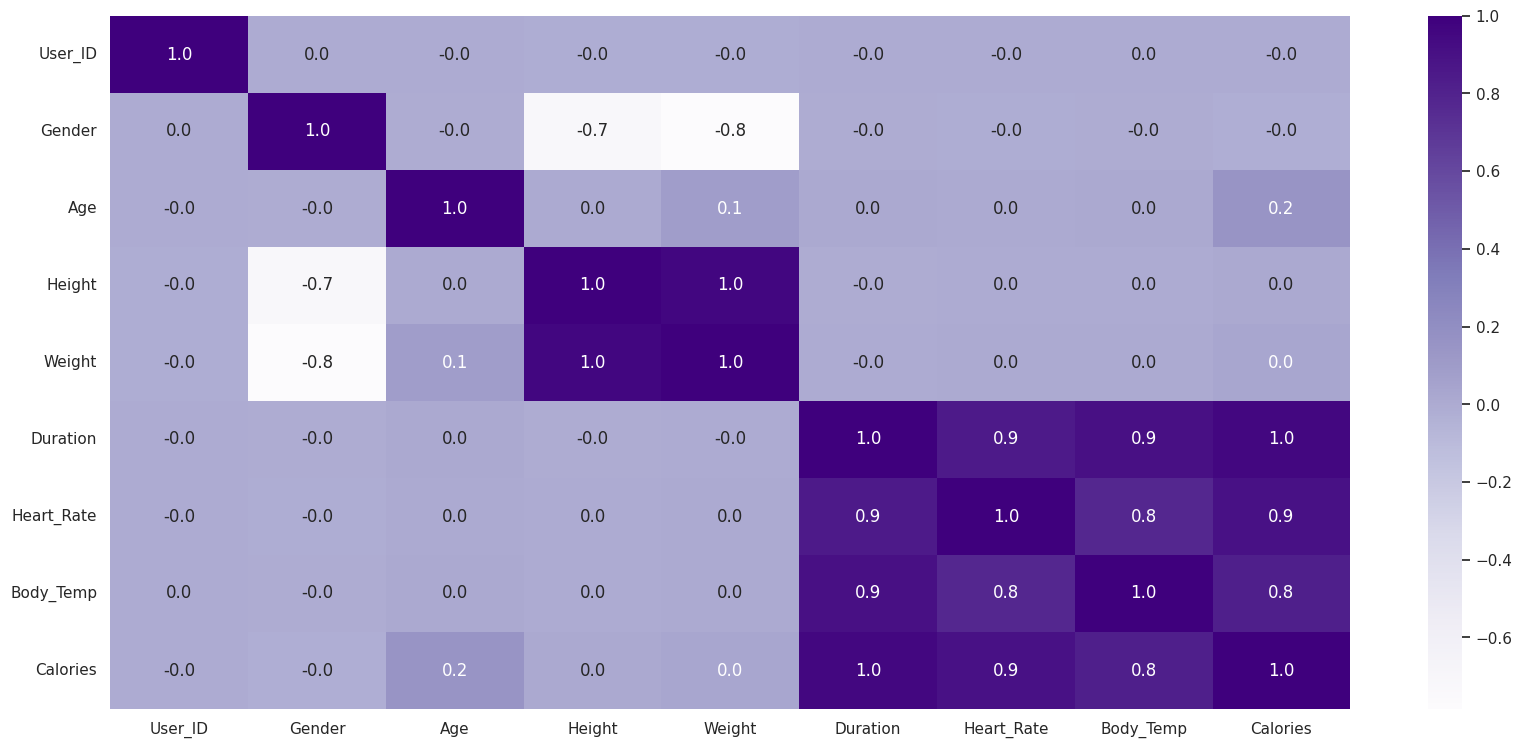

In [ ]:
correlation = workout.corr()
plt.figure(figsize=(20,9))
sns.heatmap(correlation, cbar=True, square=False, fmt='.1f', annot=True, cmap='Purples')

### 1. everyone has a good colreation with themseleves so we should ignore the diagonals
### 2. the Calories are highly corelated Duration, Heart_Rate and Body_Temp and weakly corelated with Age
### 3. we will use Duration, Heart_Rate and Body_Temp as factors to predict the Calories burnt

In [ ]:
# this is what the workout csv looks like rn
workout.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# now that we have changed the gender column we will write the upgraded csv back
workout.to_csv("//content//workout.csv")

# ________________________________________________________________________________

# 5. splitting our workout dataframe into training and testing data

In [ ]:
# here X has all the features and Y has all the target values respectively
X = workout.drop(columns=["Calories"])
Y = workout["Calories"]

In [ ]:
# splitting our dataframe into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(11250, 8) (3750, 8)
(11250,) (3750,)


# ________________________________________________________________________________

# 6. fitting our data into a linear regression models and evaluating them

Since we can use only 1 column to predict the calories we will have to make 3 models with 3 most corellated with Calories

score of lr_Body_Temp model: 0.6822306442690909

Regression Plot:


<Axes: xlabel='Body_Temp', ylabel='Calories'>

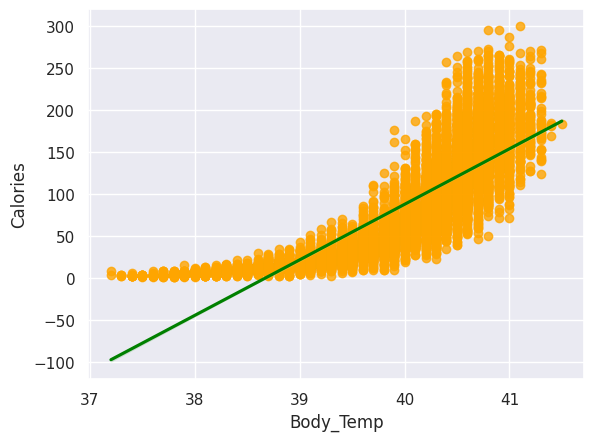

In [ ]:
# model with just Body_Temp
lr_Body_Temp = LinearRegression()
lr_Body_Temp.fit(X_train[["Body_Temp"]], Y_train)

score = lr_Body_Temp.score(X_train[["Body_Temp"]], Y_train)
print(f"score of lr_Body_Temp model: {score}\n\nRegression Plot:")
sns.regplot(x=X_train[["Body_Temp"]], y=Y_train, scatter=True, scatter_kws={"color": "orange"}, line_kws={"color": "green"})

score of lr_Heart_Rate model: 0.8053965918166371

Regression Plot:


<Axes: xlabel='Heart_Rate', ylabel='Calories'>

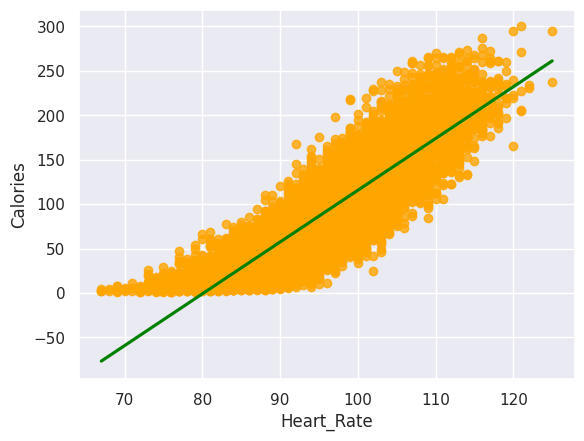

In [ ]:
# # model with just Heart_Rate
lr_Heart_Rate = LinearRegression()
lr_Heart_Rate.fit(X_train[["Heart_Rate"]], Y_train)

score = lr_Heart_Rate.score(X_train[["Heart_Rate"]], Y_train)
print(f"score of lr_Heart_Rate model: {score}\n\nRegression Plot:")
sns.regplot(x=X_train[["Heart_Rate"]], y=Y_train, scatter=True, scatter_kws={"color": "orange"}, line_kws={"color": "green"})

score of lr_Duration model: 0.913513875913752

Regression Plot:


<Axes: xlabel='Duration', ylabel='Calories'>

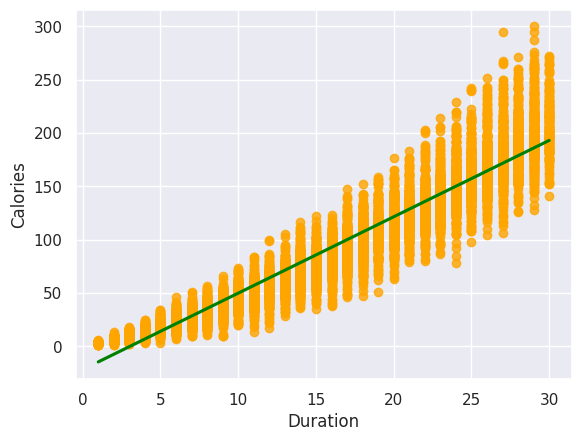

In [ ]:
# model with just Duration
lr_Duration = LinearRegression()
lr_Duration.fit(X_train[["Duration"]], Y_train)

score = lr_Duration.score(X_train[["Duration"]], Y_train)
print(f"score of lr_Duration model: {score}\n\nRegression Plot:")
sns.regplot(x=X_train[["Duration"]], y=Y_train, scatter=True, scatter_kws={"color": "orange"}, line_kws={"color": "green"})

# ________________________________________________________________________________

# evaluating the 3 linear regression models

In [ ]:
lr_Body_Temp_prediction = lr_Body_Temp.predict(X_test[["Body_Temp"]])
lr_Heart_Rate_prediction = lr_Heart_Rate.predict(X_test[["Heart_Rate"]])
lr_Duration_prediction = lr_Duration.predict(X_test[["Duration"]])

names = ["lr_Body_Temp","lr_Heart_Rate","lr_Duration"]
r2_scores = [metrics.r2_score(Y_test, lr_Body_Temp_prediction), metrics.r2_score(Y_test, lr_Heart_Rate_prediction), metrics.r2_score(Y_test, lr_Duration_prediction)]
mea_scores = [metrics.mean_absolute_error(Y_test, lr_Body_Temp_prediction), metrics.mean_absolute_error(Y_test, lr_Heart_Rate_prediction), metrics.mean_absolute_error(Y_test, lr_Duration_prediction)]
mse_scores = [metrics.mean_squared_error(Y_test, lr_Body_Temp_prediction), metrics.mean_squared_error(Y_test, lr_Heart_Rate_prediction), metrics.mean_squared_error(Y_test, lr_Duration_prediction) ]

linear_evaluation_df = pd.DataFrame({"names":names, "r2_scores":r2_scores, "r2_scores":r2_scores, "mea_scores":mea_scores, "mse_scores":mse_scores})

# making our final evaluation df
final_evaluation_df = linear_evaluation_df

linear_evaluation_df

,names,r2_scores,mea_scores,mse_scores
0,lr_Body_Temp,0.672876,28.457761,1277.097211
1,lr_Heart_Rate,0.808501,21.525127,747.612590
2,lr_Duration,0.910758,13.696015,348.402868


# ________________________________________________________________________________

# 7. fitting our data into a Multiple linear regression model and evaluating it

Text(0, 0.5, 'Calories')

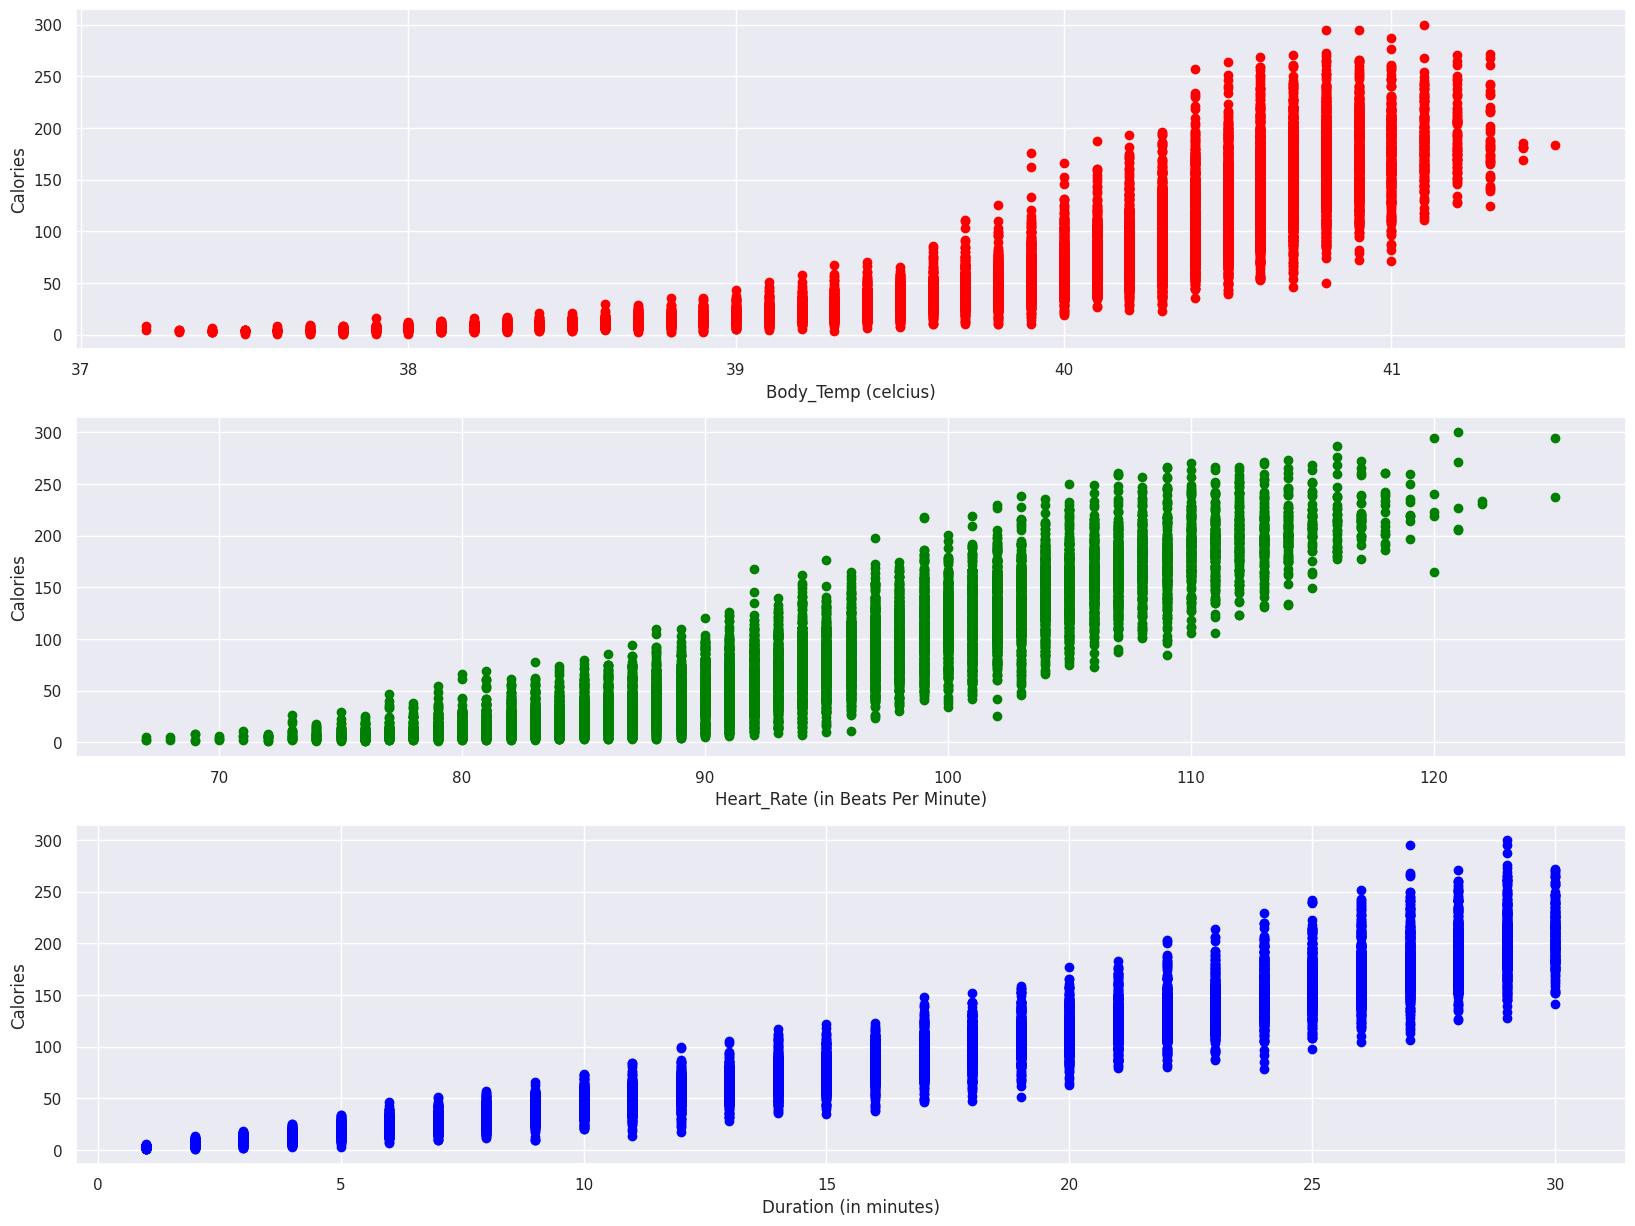

In [ ]:
# scatter plot of Body_Temp, Heart_Rate, Duration with Calories


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1)
fig.set_figheight(15)
fig.set_figwidth(20)

ax1.scatter(X_train["Body_Temp"], y=Y_train, color="red")
ax1.set_xlabel("Body_Temp (celcius)")
ax1.set_ylabel("Calories")

ax2.scatter(X_train["Heart_Rate"], y=Y_train, color="green")
ax2.set_xlabel("Heart_Rate (in Beats Per Minute)")
ax2.set_ylabel("Calories")

ax3.scatter(X_train["Duration"], y=Y_train, color="blue")
ax3.set_xlabel("Duration (in minutes)")
ax3.set_ylabel("Calories")



In [ ]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)

print(f"The coefficients of the mlr_model : {mlr_model.coef_}")
print(f"\nThe intercept of the mlr model : {mlr_model.intercept_}")
print(f"\nThe score of the mlr model : {mlr_model.score(X_train, Y_train)}")

The coefficients of the mlr_model : [ 1.58195972e-08  1.46035205e+00  4.96278521e-01 -2.05136493e-01
  3.24222177e-01  6.63910956e+00  1.98423632e+00 -1.70431354e+01]

The intercept of the mlr model : 468.38492614765954

The score of the mlr model : 0.9673043398691535


# ________________________________________________________________________________

# Evaluating the multiple linear Regression (mlr) model

In [ ]:
# Making predictions using the MLR model
mlr_prediction = mlr_model.predict(X_test)

# Calculating performance metrics
mlr_r2_score = metrics.r2_score(Y_test, mlr_prediction)
mlr_mea_score = metrics.mean_absolute_error(Y_test, mlr_prediction)
mlr_mse_score = metrics.mean_squared_error(Y_test, mlr_prediction)

# Printing the results
print(f"""
The scores of the mlr_model are as follows:-
mlr_r2_score : {mlr_r2_score}
mlr_mea_score : {mlr_mea_score}
mlr_mse_score : {mlr_mse_score}
""")

# Define the mlr_scores dictionary
mlr_scores = {
    'names': 'mlr_model',
    'r2_scores': mlr_r2_score,
    'mea_scores': mlr_mea_score,
    'mse_scores': mlr_mse_score
}

# Convert the mlr_scores dictionary to a DataFrame
mlr_scores_df = pd.DataFrame([mlr_scores])

# Concatenate the new row with the final_evaluation_df
final_evaluation_df = pd.concat([final_evaluation_df, mlr_scores_df], ignore_index=True)

# Print the updated final_evaluation_df
print("\nfinal_evaluation_df after adding mlr_scores:-")
print(final_evaluation_df)


The scores of the mlr_model are as follows:-
mlr_r2_score : 0.966869925203217
mlr_mea_score : 8.388965520449554
mlr_mse_score : 129.3401520148559


final_evaluation_df after adding mlr_scores:-
           names  r2_scores  mea_scores   mse_scores
0   lr_Body_Temp   0.672876   28.457761  1277.097211
1  lr_Heart_Rate   0.808501   21.525127   747.612590
2    lr_Duration   0.910758   13.696015   348.402868
3      mlr_model   0.966870    8.388966   129.340152


# ________________________________________________________________________________

# 8. fitting our data into a XGBregressor

In [ ]:
XGBR_model = XGBRegressor()
XGBR_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
XGBR_model.score(X_train, Y_train)

0.9995828389221243

# ________________________________________________________________________________

# evaluating the XGBR_model

In [ ]:
XGBR_prediction = XGBR_model.predict(X_test)
XGBR_r2_score = metrics.r2_score(Y_test, XGBR_prediction)
XGBR_mea_score = metrics.mean_absolute_error(Y_test, XGBR_prediction)
XGBR_mse_score = metrics.mean_squared_error(Y_test, XGBR_prediction)

print(f"""
The scores of the mlr_model are as follows:-
XGBR_r2_score : {XGBR_r2_score}
XGBR_mea_score : {XGBR_mea_score}
XGBR_mse_score : {XGBR_mse_score}
""")

XGBR_scores = {'names':'XGBR_model', 'r2_scores': XGBR_r2_score, 'mea_scores': XGBR_mea_score, 'mse_scores': XGBR_mse_score}

# Convert the XGBR_scores to DataFrame and concatenate
XGBR_scores_df = pd.DataFrame([XGBR_scores])
final_evaluation_df = pd.concat([final_evaluation_df, XGBR_scores_df], ignore_index=True)


print("\nfinal_evaluation_df after adding XGBR_scores:-")
final_evaluation_df



The scores of the mlr_model are as follows:-
XGBR_r2_score : 0.9986737797839403
XGBR_mea_score : 1.5390061184485753
XGBR_mse_score : 5.177577334264949


final_evaluation_df after adding XGBR_scores:-


,names,r2_scores,mea_scores,mse_scores
0,lr_Body_Temp,0.672876,28.457761,1277.097211
1,lr_Heart_Rate,0.808501,21.525127,747.612590
2,lr_Duration,0.910758,13.696015,348.402868
3,mlr_model,0.966870,8.388966,129.340152
4,XGBR_model,0.998674,1.539006,5.177577


# ________________________________________________________________________________

# 9. showing the final evaluation df and deciding which model to use

In [ ]:
final_evaluation_df.sort_values(by="r2_scores", ascending=False)

,names,r2_scores,mea_scores,mse_scores
4,XGBR_model,0.998674,1.539006,5.177577
3,mlr_model,0.966870,8.388966,129.340152
2,lr_Duration,0.910758,13.696015,348.402868
1,lr_Heart_Rate,0.808501,21.525127,747.612590
0,lr_Body_Temp,0.672876,28.457761,1277.097211


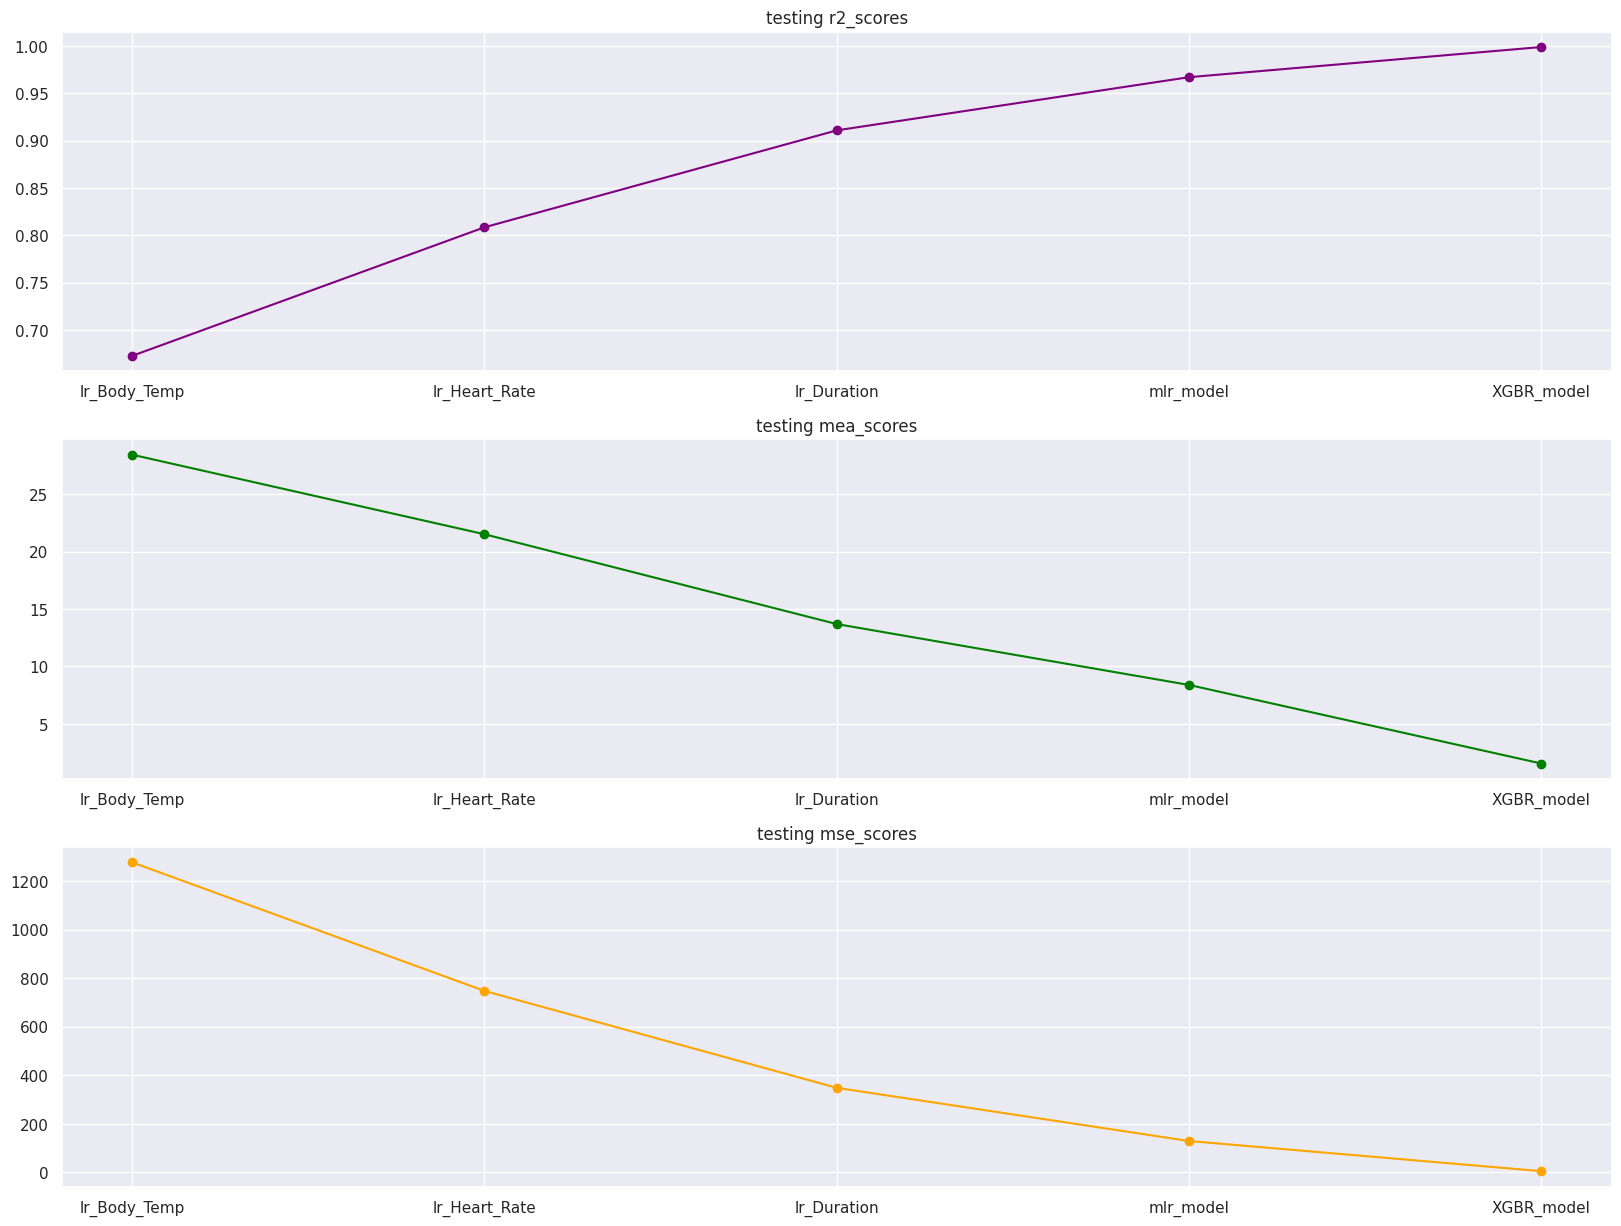

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

fig.set_figheight(15)
fig.set_figwidth(20)

ax1.plot(final_evaluation_df["names"], final_evaluation_df["r2_scores"], color="purple", marker="o")
ax1.set_title("testing r2_scores")
ax2.plot(final_evaluation_df["names"], final_evaluation_df["mea_scores"], color="green", marker="o")
ax2.set_title("testing mea_scores")
ax3.plot(final_evaluation_df["names"], final_evaluation_df["mse_scores"], color="orange", marker="o")
ax3.set_title("testing mse_scores")
plt.show()

# 1. it is clearly visible that best model is the XGBR_model with an r2 scores of 0.99 which is almost perfect

# 2. this model predicts the calories with an error of just (+1.5 or -1.5) calories making it the best model to predict the calories using the features


# 3. the models are sorted from best to worst with XGBR model being the best and lr_Body_Temp worst with an r2-score of 0.67 and an error of (+28 or -28) calories which is preety bad

In [ ]:

# Display accuracy of models
print("Final model accuracies:")
for index, row in final_evaluation_df.iterrows():
    accuracy_percentage = row['r2_scores'] * 100  # Convert R² score to percentage
    print(f"Model: {row['names']}, Accuracy: {accuracy_percentage:.2f}%, MEA Score: {row['mea_scores']:.4f}, MSE Score: {row['mse_scores']:.4f}")



Final model accuracies:
Model: lr_Body_Temp, Accuracy: 67.29%, MEA Score: 28.4578, MSE Score: 1277.0972
Model: lr_Heart_Rate, Accuracy: 80.85%, MEA Score: 21.5251, MSE Score: 747.6126
Model: lr_Duration, Accuracy: 91.08%, MEA Score: 13.6960, MSE Score: 348.4029
Model: mlr_model, Accuracy: 96.69%, MEA Score: 8.3890, MSE Score: 129.3402
Model: XGBR_model, Accuracy: 99.87%, MEA Score: 1.5390, MSE Score: 5.1776


In [ ]:
# Install Gradio if not already installed


import gradio as gr
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

# Load your model and data (make sure to adjust the file paths)
class CaloriePredictor:
    def __init__(self):
        self.workout_csv_path = "workout.csv"  # Adjust this path accordingly
        # Load workout data
        workout_df = pd.read_csv(self.workout_csv_path)
        workout_df.drop(columns=workout_df.columns[0], axis=1, inplace=True)

        # Prepare data for model training
        X = workout_df.drop(columns=["Calories", "User_ID"])
        Y = workout_df[["Calories"]]

        # Train model
        self.XGBR_model = XGBRegressor().fit(X, Y)

    def predict_calories(self, gender, age, height, weight, duration, heart_rate, body_temp):
        gender_numeric = 0 if gender == "M" else 1  # Convert gender to numeric

        # Prepare input for prediction
        input_data = np.array([[gender_numeric, age, height, weight, duration, heart_rate, body_temp]])

        # Predict calories burned
        prediction = self.XGBR_model.predict(input_data)
        return int(prediction[0])

    def recommend_diet(self, goal):
        if goal == "Losing Weight":
            return {
                "Breakfast": "Oats with skim milk and fruits",
                "Lunch": "Grilled chicken salad with mixed vegetables",
                "Dinner": "Dal (lentils) with brown rice and steamed broccoli"
            }
        elif goal == "Gaining Weight":
            return {
                "Breakfast": "Paneer paratha with yogurt",
                "Lunch": "Chicken biryani with raita",
                "Dinner": "Paneer butter masala with naan"
            }
        else:
            return {
                "Breakfast": "Please select a valid goal.",
                "Lunch": "",
                "Dinner": ""
            }

# Create an instance of the predictor
calorie_predictor = CaloriePredictor()

# Define Gradio interface
def gradio_interface(gender, age, height, weight, duration, heart_rate, body_temp, goal):
    # Calculate BMI
    height_m = height / 100  # Convert cm to meters
    bmi = weight / (height_m ** 2)

    # Predict calories burned
    calories_burned = calorie_predictor.predict_calories(gender, age, height, weight, duration, heart_rate, body_temp)

    diet_recommendation = calorie_predictor.recommend_diet(goal)

    return (f"Your BMI is: {bmi:.2f}\n"
            f"The predicted calories burned are: {calories_burned}\n\n"
            f"**Diet Recommendations:**\n"
            f"- **Breakfast:** {diet_recommendation['Breakfast']}\n"
            f"- **Lunch:** {diet_recommendation['Lunch']}\n"
            f"- **Dinner:** {diet_recommendation['Dinner']}")

# Create inputs and outputs for the Gradio app
inputs = [
    gr.Radio(["M", "F"], label="Gender"),
    gr.Slider(minimum=0, maximum=100, label="Age"),
    gr.Slider(minimum=100, maximum=250, label="Height (cm)"),
    gr.Slider(minimum=30, maximum=200, label="Weight (kg)"),
    gr.Slider(minimum=1, maximum=180, label="Duration (minutes)"),
    gr.Slider(minimum=40, maximum=200, label="Average Heart Rate"),
    gr.Slider(minimum=30.0, maximum=42.0, label="Body Temperature (°C)"),
    gr.Radio(["Losing Weight", "Gaining Weight"], label="Goal")
]

output = gr.Textbox(label="BMI and Calories Burned with Diet Recommendation")

# Launch the Gradio app
gr.Interface(fn=gradio_interface,
             inputs=inputs,
             outputs=output,
             title="Calorie Tracker with BMI and Diet Recommendations",
             description="Enter your details to calculate your BMI and predict calories burned during a workout. Receive diet recommendations for breakfast, lunch, and dinner based on your goals."
            ).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aa753a5cb5a6f8bb5d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
